In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('CleanBikeShare.csv')
df.sample(5)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_class
137642,158476,751,2019-02-05 18:57:41.897,2019-02-05 19:10:13.443,26.0,1st St at Folsom St,37.787290,-122.394380,104.0,4th St at 16th St,37.767045,-122.390833,4614,Subscriber,30.0,Male,No,Very Long
75931,88106,402,2019-02-16 20:08:32.618,2019-02-16 20:15:15.027,368.0,Myrtle St at Polk St,37.785434,-122.419622,74.0,Laguna St at Hayes St,37.776435,-122.426244,5009,Subscriber,25.0,Male,No,Medium
61522,70584,347,2019-02-19 18:11:52.070,2019-02-19 18:17:40.001,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,4549,Subscriber,36.0,Male,No,Medium
11003,12493,1221,2019-02-27 17:18:37.121,2019-02-27 17:38:58.845,245.0,Downtown Berkeley BART,37.870139,-122.268422,259.0,Addison St at Fourth St,37.866249,-122.299371,4765,Customer,19.0,Male,No,Very Long
115939,134095,194,2019-02-08 17:57:51.171,2019-02-08 18:01:06.035,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,241.0,Ashby BART Station,37.852477,-122.270213,4909,Subscriber,55.0,Male,Yes,Short


In [3]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

## Observation Summary
1. Most crowded stations are San Francisco Caltrain Station 2 and Market St
2. Most trips go around Berry St 4th and Harry Bridges Plaza
3. Most Bikesharers are of age 30
4. Peak times are on morning go to work and afternoon return
5. Most Bikesharers are males
6. Age doesn't affect share duration
6. Although most bikesharers are males and most bikesharers are of age 30 but females are the most subscribers of age 30
7. Simpson's paradox could happen assuming that most bikesharers of age 30 males are subscribers while its inversed here
7. Since most bikesharers are males so it's expected to see most subscribers as males as we see in the dataset
8. Bikeshare for all trip is affected by subscription
9. Most bike sharers under 30 are the most to use bikeshare for their whole trip
10. Age doesn't really affect share duration 

## Main two factors affected by change in dataset values
are both User Type and why happens people to not share bikes for their whole trip.
Let's see that together throughout the following plots

## As gender and age change it tends to show a significant change in subscriptions as we see here

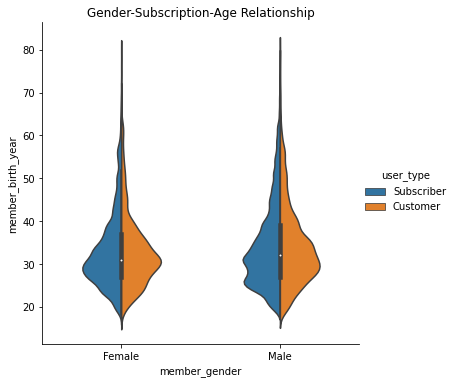

In [4]:
sb.catplot(x="member_gender", y="member_birth_year",
                hue="user_type",
                data=df, kind="violin", split=True, width = 0.5);
plt.title('Gender-Subscription-Age Relationship');

As we can see a significant change at age 30 makes guys of these age tend not to subscribe

On the other hand this affects sharing bikes for the whole trip as all people who didn't subscribe tend not to use  bikeshare for their whole ride as we can see down here

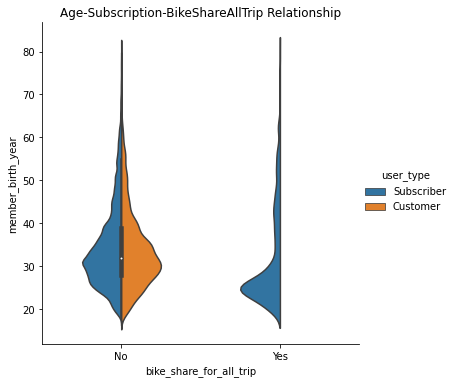

In [5]:
sb.catplot(x="bike_share_for_all_trip", y="member_birth_year",
                hue="user_type",
                data=df, kind="violin", split=True, width = 0.5);
plt.title('Age-Subscription-BikeShareAllTrip Relationship');

Another factor affecting biksharing is age where it happens that between both genders people less than 30 tend to use bikesharing systems for their whole trip as seen below

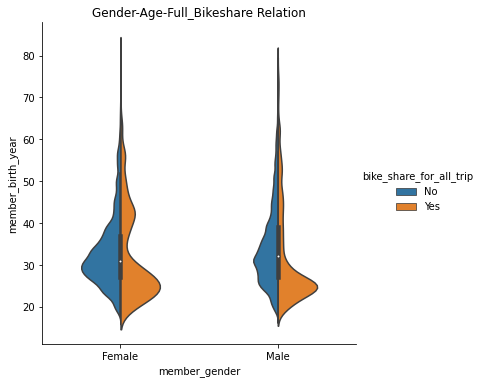

In [6]:
sb.catplot(x="member_gender", y="member_birth_year",
                hue="bike_share_for_all_trip",
                data=df, kind="violin", split=True, width = 0.5);
plt.title("Gender-Age-Full_Bikeshare Relation");

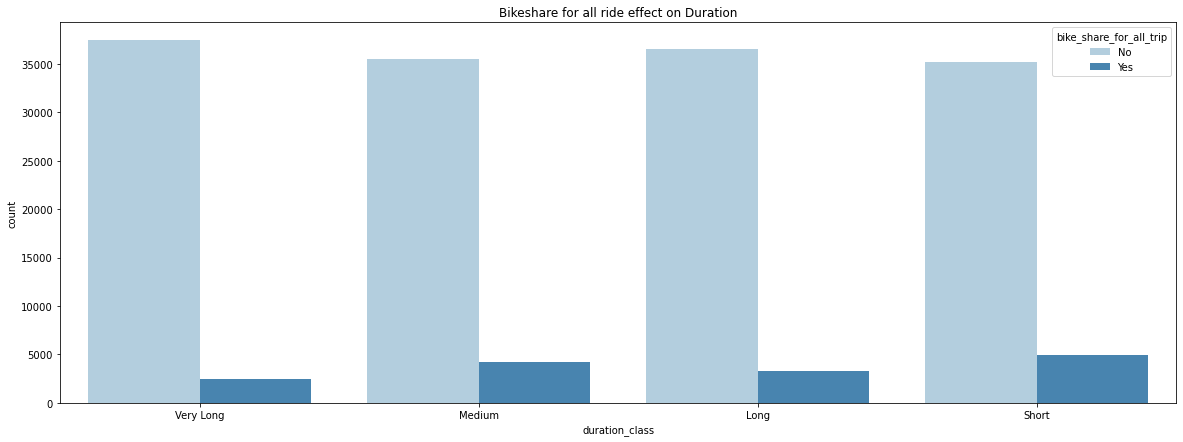

In [12]:
plt.figure(figsize=(20,7))
plt.title('Bikeshare for all ride effect on Duration')
sb.countplot(data = df, x = df.duration_class , hue = 'bike_share_for_all_trip', palette = 'Blues');

As observed here duration counts higher on not sharing bikes for whole trip while it decreases on sharing it for the whole trip 